# Ejercicio Clase 1

In [26]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from scipy.io.wavfile import write
from scipy.signal import resample # para el submuestreo
from IPython.display import Audio # para escuchar la senal

import numpy as np #para poder utilizar np
import matplotlib.pyplot as plt  #para poder utilzar los plt





In [27]:
from scipy.io import wavfile
import numpy as np

# cargar el archivo de audio estéreo
rate, data = wavfile.read('audio1_clase1.wav')

#señal análoga
left_channel = data[:, 0]
right_channel = data[:, 1]

# Normalización de la señal 
#canal izquierdo
left_channel=left_channel/float(max(abs(left_channel)))

#canal derecho
right_channel=right_channel/float(max(abs(right_channel)))

t=np.arange(0,float(len(data))/rate,1/rate)
t1=np.arange(0,float(len(left_channel))/rate,1/rate)
t2=np.arange(0,float(len(right_channel))/rate,1/rate)



#señal digital 

#canal izquierdo
norm1 =1.0/np.max(np.abs(left_channel))
sA1 = 460*left_channel*norm1
valor1=np.round(sA1)

#canal derecho
norm2 =1.0/np.max(np.abs(right_channel))
sA2= 460*right_channel*norm2
valor2=np.round(sA2)


# guardar los canales como archivos separados
wavfile.write('canal_izquierdo.wav', rate, left_channel)
wavfile.write('canal_derecho.wav', rate, right_channel)


In [28]:
Audio(left_channel, rate=rate) #para escuchar la señal del canal izquierdo si lo desea

In [29]:
Audio(right_channel, rate=rate) #para escuchar la señal del canal derecho si lo desea

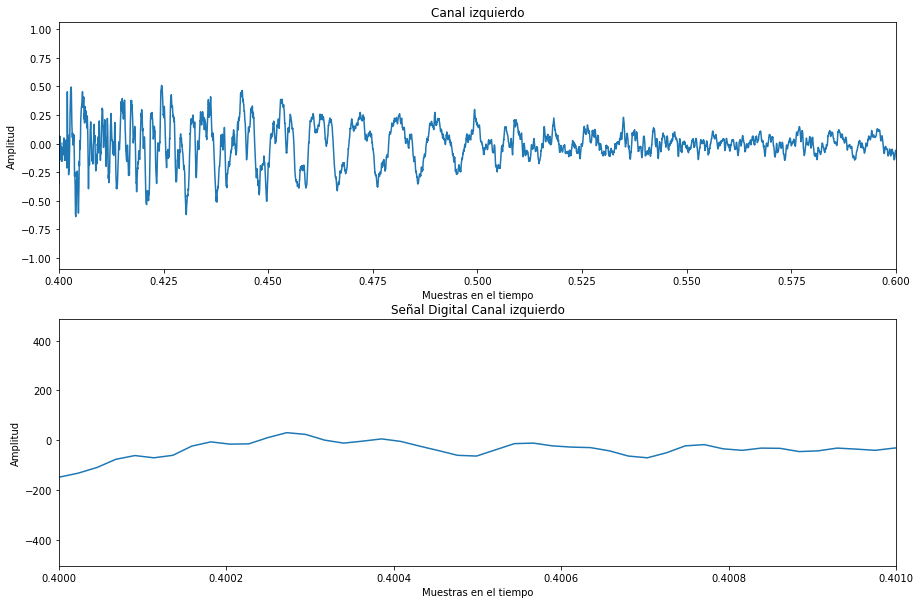

In [30]:
# señal canal izquierdo
plt.figure(figsize=(15,10 ))
plt.subplot(2, 1, 1)
plt.plot(t1,left_channel)
##plt.stem(t,left_channel)
plt.title('Canal izquierdo')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.xlim(0.4,0.6)

plt.subplot(2, 1, 2)
plt.plot(t1,valor1)
plt.title('Señal Digital Canal izquierdo')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.xlim(0.4,0.401)
plt.show()

### Tomamos la gráfica desde 0.4 hasta 0.6 para poder observa mejor la gráfica.

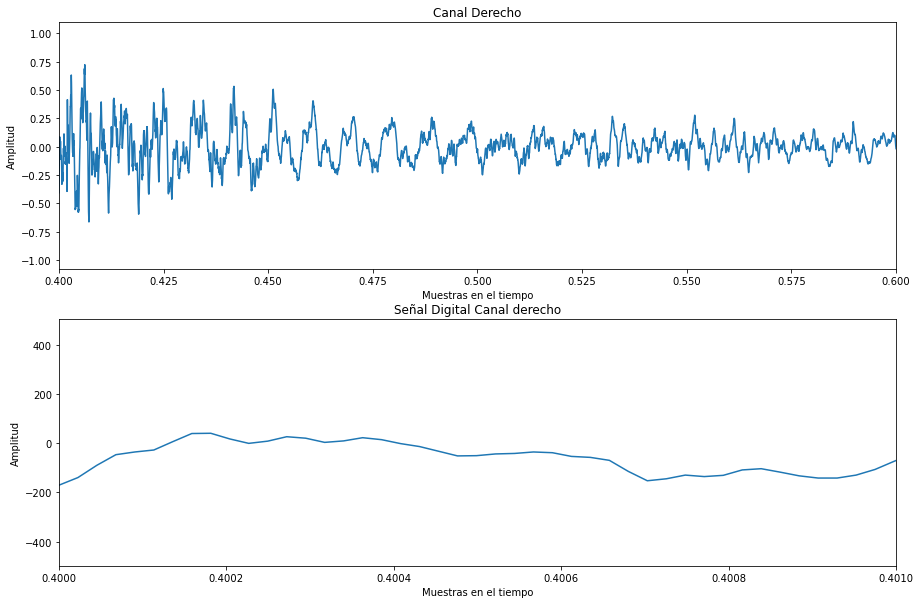

In [31]:
plt.figure(figsize=(15,10 ))
plt.subplot(2, 1, 1)
plt.plot(t2,right_channel)
##plt.stem(t,left_channel)
plt.title('Canal Derecho')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.xlim(0.4,0.6)

plt.subplot(2, 1, 2)
plt.plot(t2,valor2)
plt.title('Señal Digital Canal derecho')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.xlim(0.4,0.401)
plt.show()

## seleccionamos el mismo instante de tiempo para poder observar la señal análoga y digital de ambos canales.

# Ejercicio clase 2

# Le agregaremos un ruido a las señales en ambos canales para observar como influye este en el auidio

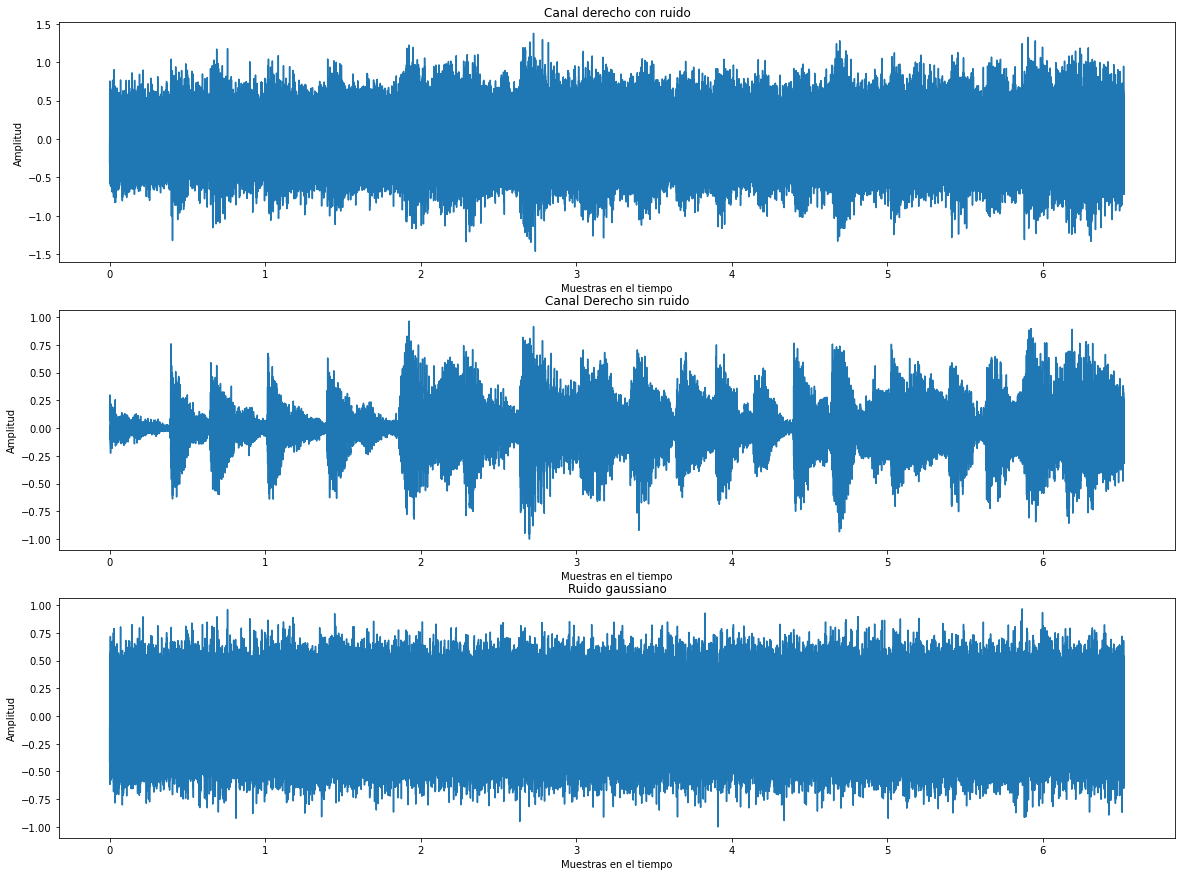

In [32]:
noise= np.random.normal(0,20,len(left_channel))
noise=noise/float(max(abs(noise)))
signal_noise=left_channel+noise
tn=np.arange(0,float(len(signal_noise))/rate,1/rate)


# Graficamos la señal original respecto a la señal con ruido
plt.figure(figsize=(20,15 ))
plt.subplot(3, 1, 1)
plt.plot(tn,signal_noise)
plt.title('Canal derecho con ruido')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(tn,left_channel)
plt.title('Canal Derecho sin ruido')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(tn,noise)
plt.title('Ruido gaussiano')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.show()


# para escuchar la señal del canal derecho con ruido

In [33]:
Audio(signal_noise, rate=rate) 

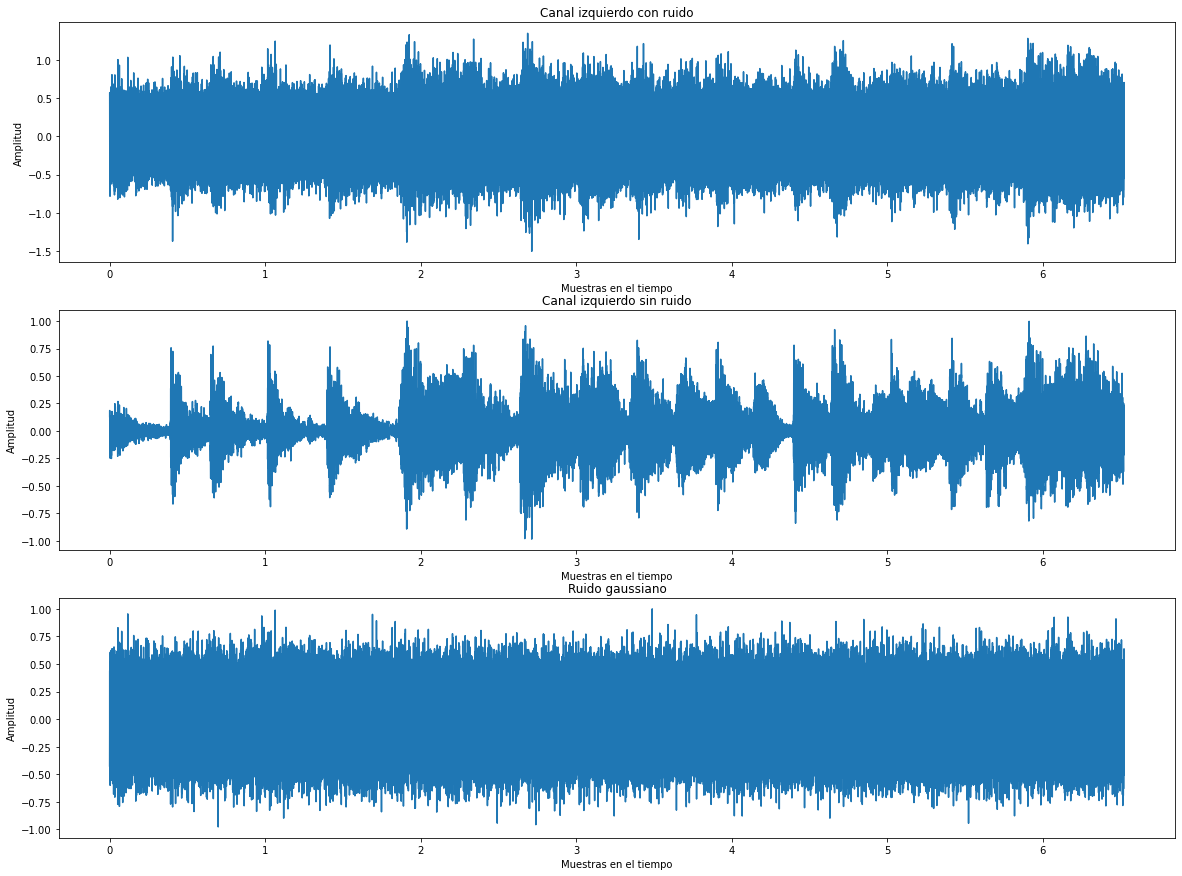

In [34]:
noise2= np.random.normal(0,10,len(left_channel))
noise2=noise2/float(max(abs(noise2)))

signal_noise2=right_channel+noise2
tn2=np.arange(0,float(len(signal_noise2))/rate,1/rate)


# Graficamos la señal original respecto a la señal con ruido
plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(tn2,signal_noise2)
plt.title('Canal izquierdo con ruido')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(tn2,right_channel)
plt.title('Canal izquierdo sin ruido')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(tn2,noise2)
plt.title('Ruido gaussiano')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.show()


# Audio con el ruido gaussiano del canal izquierdo

In [35]:
Audio(signal_noise2, rate=rate) 

##  Ejercicio 2

## Criterio de Nyquist para la frecuencia de muestreo.

### cogemos la frecuencia de muestreo y la duplicamos para obserar que le sucede al audio 

Text(0, 0.5, 'Amplitud')

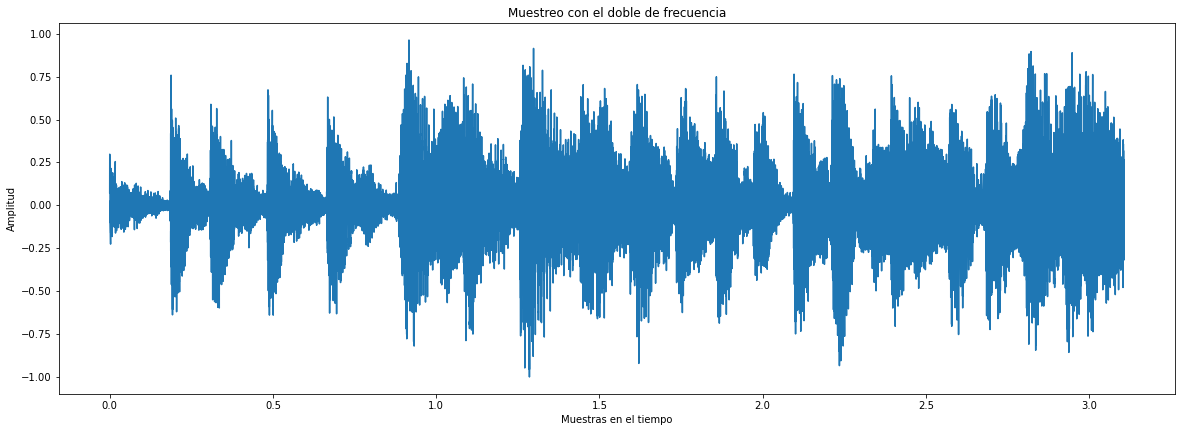

In [36]:
fs1=2.1*rate
t_m=np.arange(0,float(len(left_channel))/fs1,1/fs1)

# Graficamos la señal original respecto a la señal con ruido
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.plot(t_m,left_channel)
plt.title('Muestreo con el doble de frecuencia')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')


## Audio con el doble de frecuencia

In [37]:
Audio(left_channel, rate=fs1) 

### Ahora, realizamos tomamos una frecuencia cuyo valor es la mitad de la frecuencia original 

Text(0, 0.5, 'Amplitud')

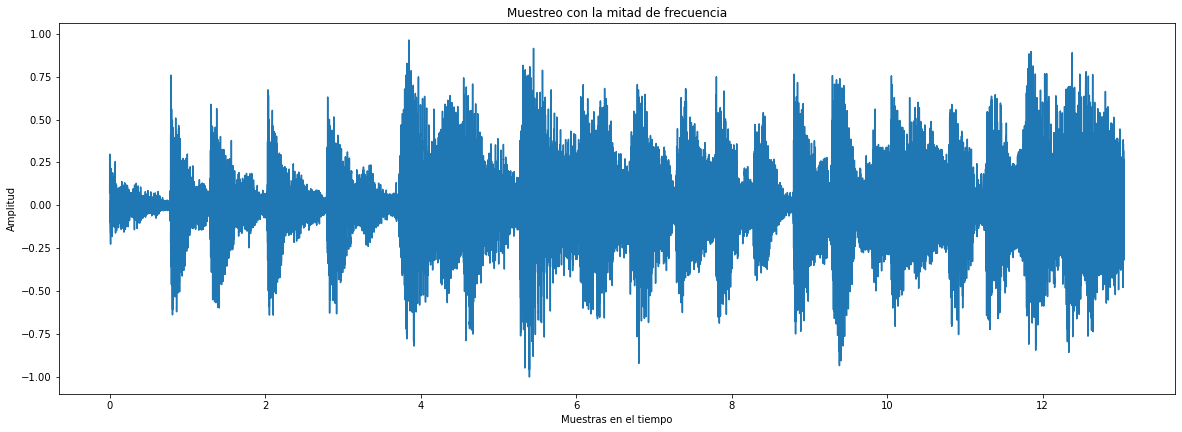

In [38]:
fs2=0.5*rate
t_m=np.arange(0,float(len(left_channel))/fs2,1/fs2)

# Graficamos la señal original respecto a la señal con ruido
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.plot(t_m,left_channel)
plt.title('Muestreo con la mitad de frecuencia')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')

### Ahora, realizamos tomamos una frecuencia cuyo valor es la mitad de la frecuencia original 

In [39]:
Audio(left_channel, rate=fs2) 

### observamos la gran diferencia, donde al disminuir la frecuencia de muestreo la señal no logra obtener todos los valores necesarios, por tal motivo en algunos casos esta señal se verá recortada.


# clase 3

# Creación de un escalon con 40

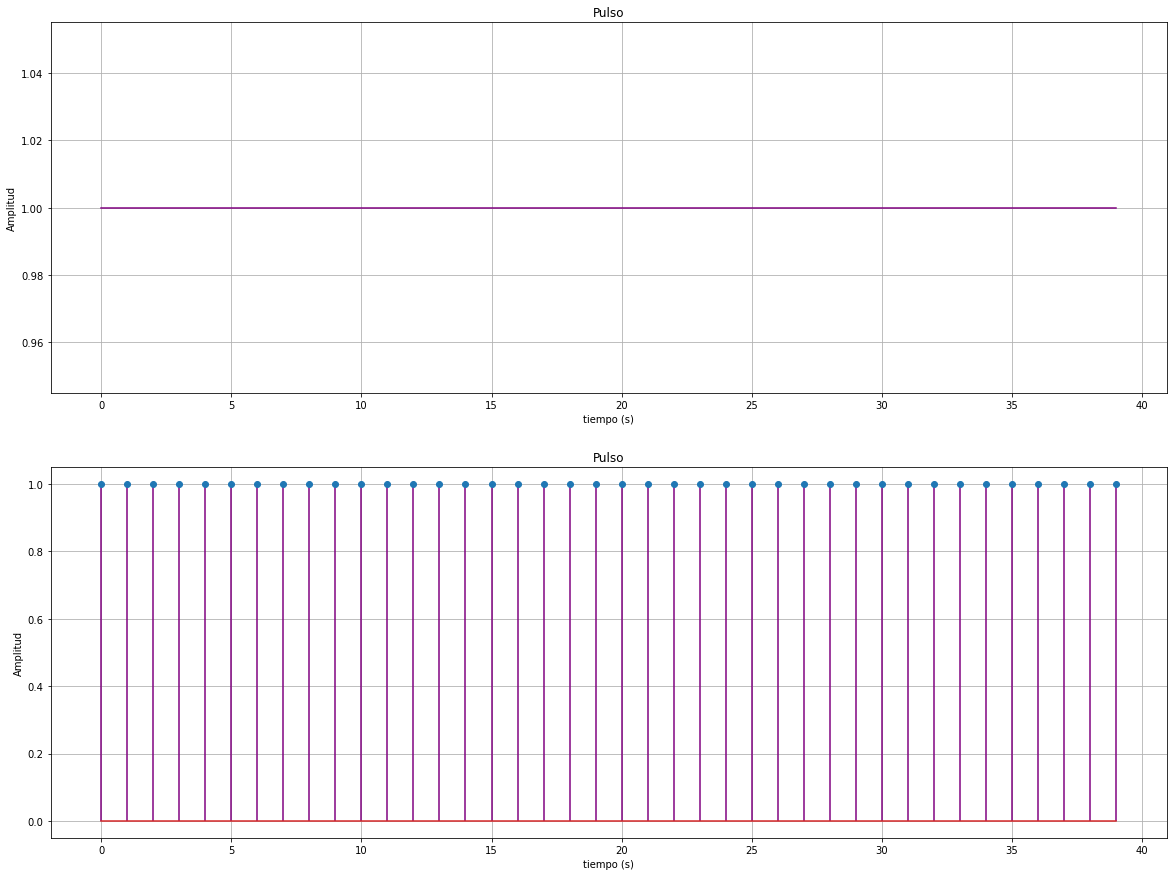

In [40]:
import numpy
import numpy as np
import matplotlib.pyplot as plt

tren=np.ones(40)
t=np.arange(0,len(tren),1)

# Se grafica el pulso
plt.figure(figsize=(20,15 ))
plt.subplot(2, 1, 1)
plt.plot(t,tren,'purple')
plt.grid()
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Pulso")

plt.subplot(2, 1, 2)
plt.stem(t,tren,'purple')
plt.grid()
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Pulso")
plt.show()

#### Secuencia de fibonacci, primeros  terminos 17 terminos

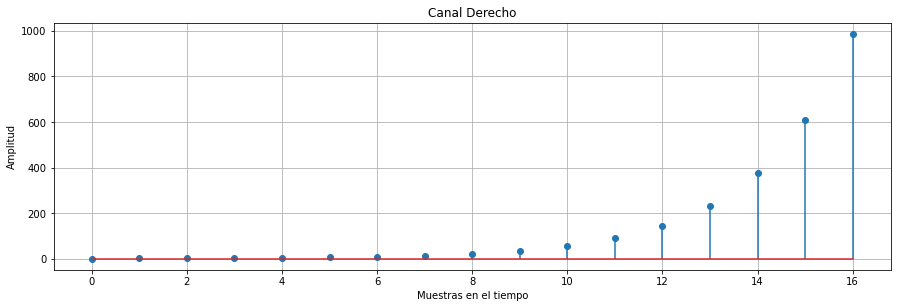

In [41]:
secuencia_fn=[0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987]
t_secu= np.arange(len(secuencia_fn))   

plt.figure(figsize=(15,10 ))
plt.subplot(2, 1, 1)
##plt.plot(t2,right_channel)
plt.stem(t_secu,secuencia_fn)
plt.title('Canal Derecho')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')
plt.grid()

# Clase 4

## Desplazamiento de una señal 

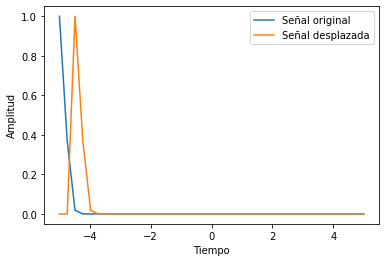

In [42]:

t_c4 = np.linspace(-5, 5, 40)  # Vector de tiempo
f_c4 = np.exp(-t**2)  # Señal gaussiana
f_shifted = np.roll(f_c4, 2)
plt.plot(t_c4, f_c4, label='Señal original')
plt.plot(t_c4, f_shifted, label='Señal desplazada')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

### Filtro de media movil

In [43]:
datos = np.loadtxt('data_precipitacion.txt', delimiter=',')

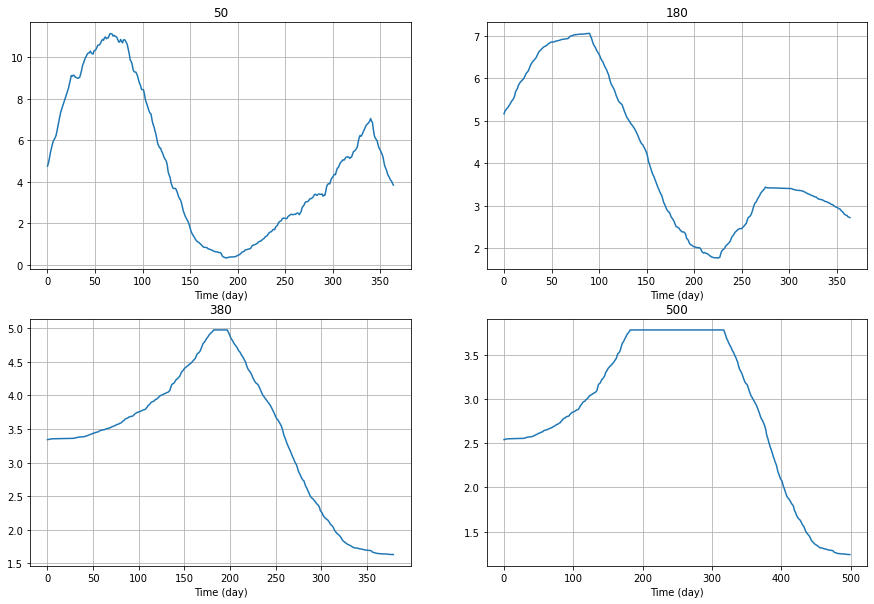

In [44]:
day= []
year =[]
value=[]

for i in range(len(datos)):
    day.append(datos[i][0])
    year.append(datos[i][1])
    value.append(datos[i][2])#
day=np.array(day)
year=np.array(year)
value=np.array(value)

my_year =value[np.where(year==1997)[0]]
time_year= day[np.where(year==1997)[0]]

#Valores del filtro de media movil
L= [50,180,380,500]
aux=0
plt.figure(figsize=(15,10))

for i in L:
    aux+=1

    #Coeficientes del filtro de media movil
    coefs= np.ones(i)/float(i)

    #Función de transferencia
    num=np.zeros(i)
    num[0]=1.0/i
    num[-1]=-1.0/i
    den=np.zeros(i)
    den[0]=1
    den[1]=-1
    
    senal_smooth=np.convolve(my_year,coefs,mode='same')
    
    #Gráfica de las señales obtenidas en el 2.1.6
    plt.subplot(2,2,aux)
    plt.plot(senal_smooth)
    plt.grid()
    plt.title(i)
    plt.xlabel("Time (day)")

#### se puede concluir que si el N del filtro es muy pequeño, la señal no se puede graficar de manera adecuada dado que toma muy pocos valores para esta graficar, pero tambén si se toma demasiados valores, la gráfica tampoco se puede graficar dado que toma tantos valores por muestra que esta tiende a dañarse, hay que saber tener un equilibrio entre el N para poder muestrear bien la señal. En nuestro caso el orden del filtro que mejor grafíca la señal es de 50

# Clase 5

### Una de las grandes aplicaciones de la linealidad temporal, es la linealidad de los filtros, por tal motivo para este ejercicio vamos a observar la salida del filtro de media movil utlizado en el ejercicio anterior para observar su linealidad 

C:\Users\gil_b\anaconda3\lib\site-packages\scipy\signal\filter_design.py:475: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


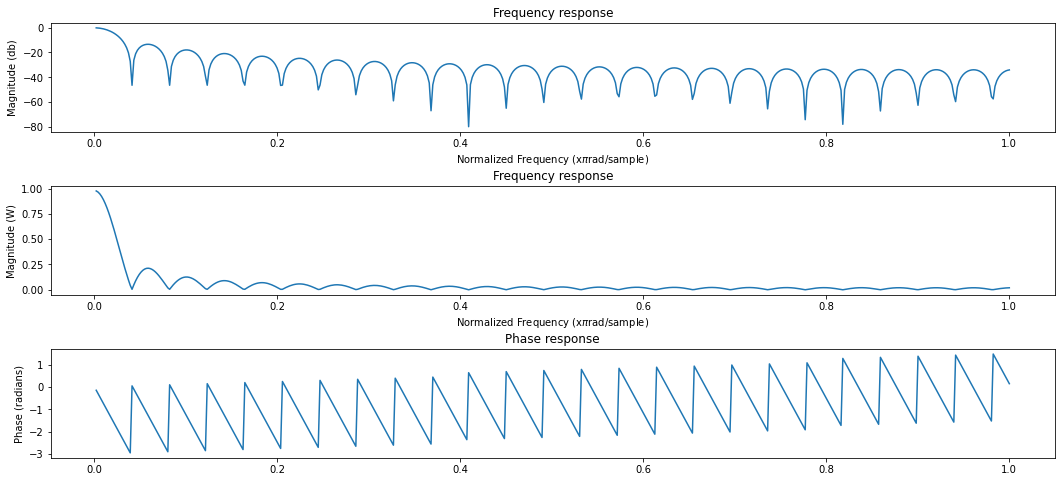

In [45]:
from ztrans import *

L=50
#Coeficientes del filtro de media movil
coefs= np.ones(L)/float(L)

#Función de transferencia
num1=np.zeros(L)
num1[0]=1.0/L
num1[-1]=-1.0/L
den1=np.zeros(L)
den1[0]=1
den1[1]=-1
mfreqz(num1,den1)
plt.show()


### la tercera gráfica nos muestra la linealidad del filtro de media movil, Esto significa que si la entrada se multiplica por una constante, la salida del filtro también se multiplicará por la misma constante

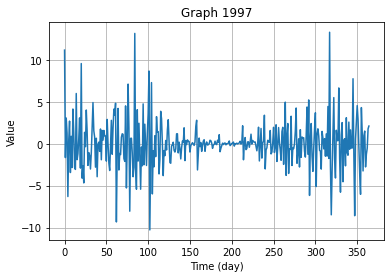

In [46]:
difcoefs=[1,-1]
senal_diferencia=np.convolve(my_year,difcoefs,mode='same')
plt.plot(senal_diferencia)
plt.xlabel("Time (day)")
plt.ylabel("Value")
plt.title('Graph 1997')
plt.grid()
plt.show()

#### Cuenado se registra cambios muy rapidos, la salida de la convolución tendrá valores altos en los puntos donde se producen esos cambios. 

# Clase de la 6 a la 9 

#### Para el ejercicio de la correlación, vamos a utilizar lasfiguras realizadas anteriormentes, como el pulso, para poder aicionarle un ruido y después realizar la correlación y ver el tiempo de retardo y que tanto se correlacionan la señal original con la señal con ruido

153


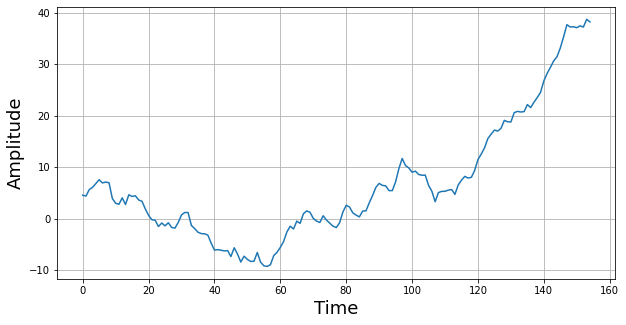

In [47]:
from utils import delay_noise
signal_noise= delay_noise(tren)  # se le agrega el ruido
xcorr=np.correlate(signal_noise,tren) # se utiliza la función correlate para realizar la correlación 

plt.figure(figsize=(10,5))
plt.plot(xcorr,label= "Autocorrelacion de pulso")
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize= 18)
plt.grid("on")

##para calcular el retraso de la gráfica observamos la siguiente función y lo comparamos con el de la gráfica

retraso=np.argmax(xcorr)
print(retraso)



#### En la gráfica observamos dos picos, uno en aproximadamente en 56 segundos y el otro en aproximadamente 85, estos dos picos nos dicen que son el tiempo donde la señal tiende aparecerse entre ellas, dicho lo anterios; observamos que después de los 85 segundos aproximadamente la señal original y la señal distorsionada tienden a parecersen más

### Transformada Z y Polos y ceros 

#### Para poder realizar la transformada z y sacar los polos y ceros, necesitamos una función de transferencia, la cual se creará en dos vectores, donde uno es el numerador de dicha función y la otra es el denominador de la misma 

$$H(x)= \frac{Y(x)}{X(x)}=\frac{z+ 15}{z^2+2z+0.3}$$

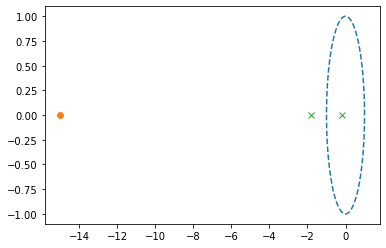

In [48]:
num = [1,15]
den = [1,2,0.3]
zeropoles(num,den) # graficamos los polos y ceros Polos y ceros 

#### Dado que uno de los polos es mayor es mayor a 1, este sistema es inestable 

### Para realizar el ejercicio de la transformada Z, lo vamos a realizar mediante un ejemplo aplicativo, el cual es el filtro con una frecuencia de muestreo de 5000Hz.  Para ello primero calcularemos la respuesta en frecuencia de la función de transferencia utilizada en el anterior ejemplo. 

In [49]:
fs=5000
w, h = signal.freqz(num, den)

Text(0, 0.5, 'Amplitud')

<Figure size 432x288 with 0 Axes>

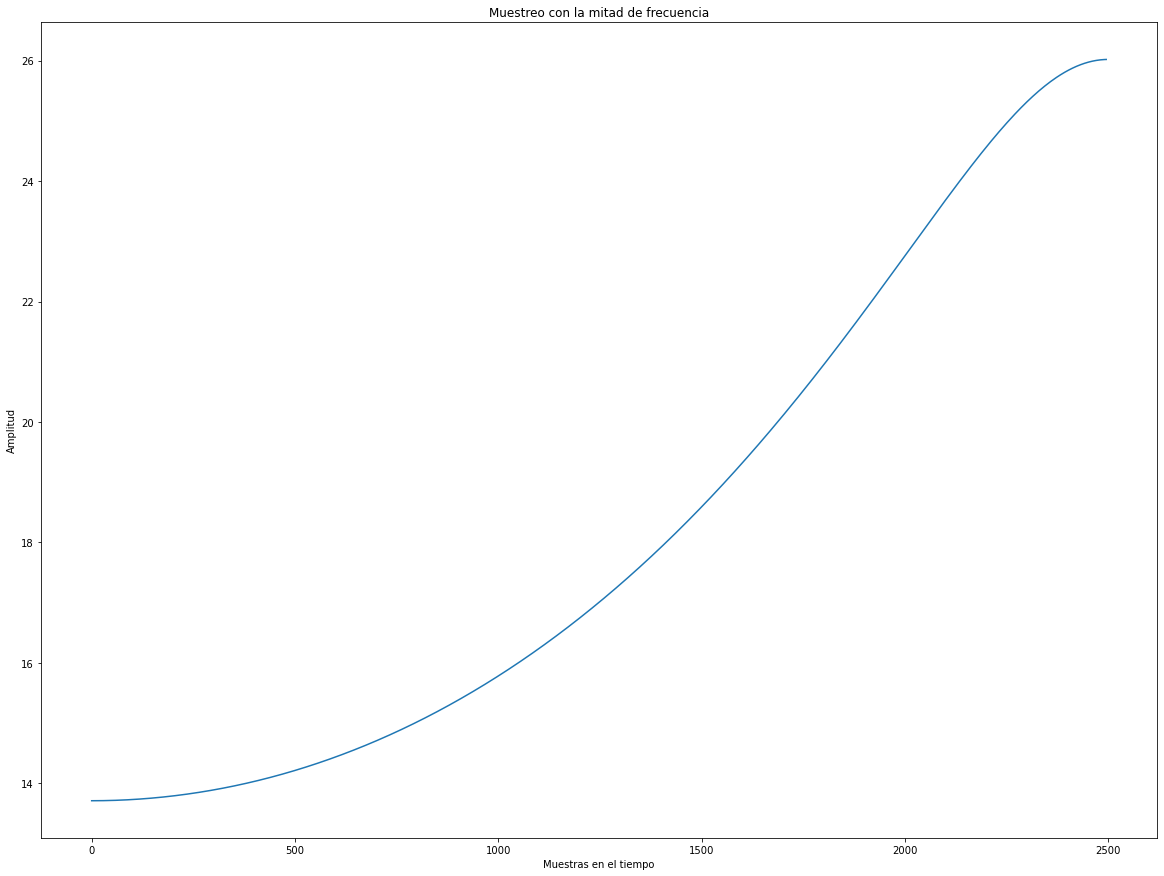

In [50]:
plt.figure()
plt.figure(figsize=(20,15))
plt.plot(w/np.pi*fs/2, 20*np.log10(abs(h)))
plt.title('Muestreo con la mitad de frecuencia')
plt.xlabel('Muestras en el tiempo')
plt.ylabel('Amplitud')